In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
dir = "D:/1. KULIAH/SEM9/SKRIPSI PT2/SKRIPSI HADI/"

In [3]:
df = pd.read_excel(dir+"Data Inflasi.xlsx")

In [4]:
df.head()

,Periode,Data Inflasi
0,2025-02-01,-0.0009
1,2025-01-01,0.0076
2,2024-12-01,0.0157
3,2024-11-01,0.0155
4,2024-10-01,0.0171


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Periode       266 non-null    datetime64[ns]
 1   Data Inflasi  266 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


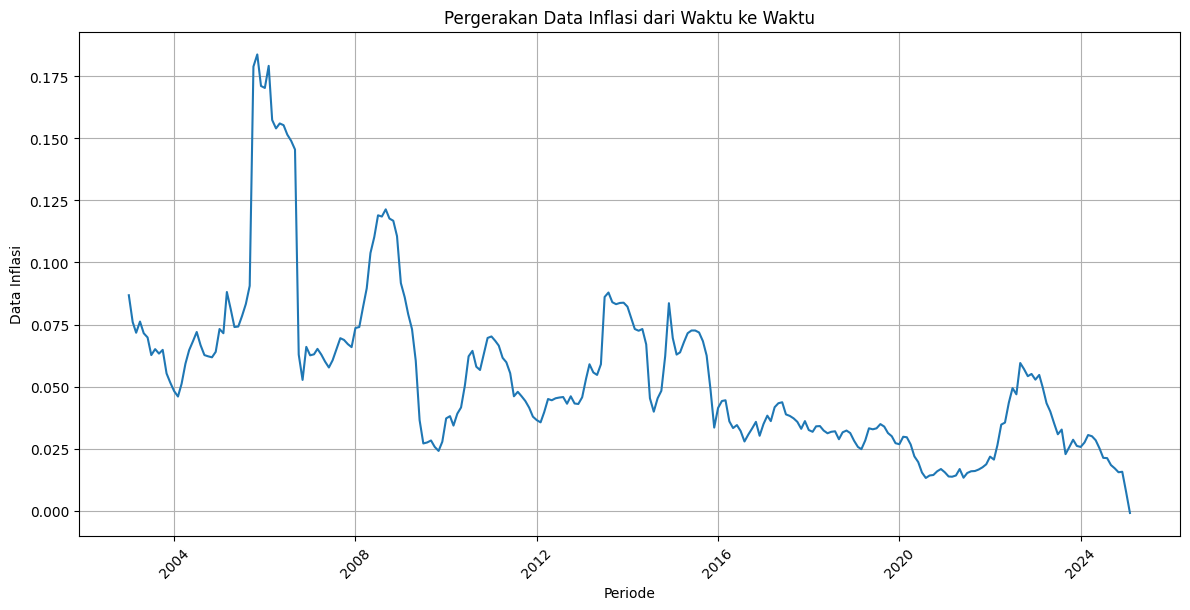

In [6]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Periode'], df['Data Inflasi'], linestyle='-')
plt.title('Pergerakan Data Inflasi dari Waktu ke Waktu')
plt.xlabel('Periode')
plt.ylabel('Data Inflasi')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [7]:
# === Normalisasi ulang jika belum dilakukan ===
denormalized = df['Data Inflasi']
df['Data Inflasi'] = (df['Data Inflasi'] - df['Data Inflasi'].min()) / (df['Data Inflasi'].max() - df['Data Inflasi'].min())

In [8]:
denormalized

0     -0.0009
1      0.0076
2      0.0157
3      0.0155
4      0.0171
        ...  
261    0.0715
262    0.0762
263    0.0717
264    0.0760
265    0.0868
Name: Data Inflasi, Length: 266, dtype: float64

In [9]:
# === Parameter ===
seq_len = 5

# === Buat dataset time series ===
X = []
y = []
for i in range(len(df) - seq_len):
    X.append(df['Data Inflasi'].values[i:i+seq_len])
    y.append(df['Data Inflasi'].values[i+seq_len])

X = np.array(X)
y = np.array(y)

In [10]:
# Reshape untuk LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

In [11]:
# Split train/test
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [12]:
# === Buat dan latih ulang model ===
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
208/208 - 1s - 6ms/step - loss: 0.0066
Epoch 2/100
208/208 - 0s - 1ms/step - loss: 0.0038
Epoch 3/100
208/208 - 0s - 1ms/step - loss: 0.0036
Epoch 4/100
208/208 - 0s - 1ms/step - loss: 0.0031
Epoch 5/100
208/208 - 0s - 1ms/step - loss: 0.0028
Epoch 6/100
208/208 - 0s - 1ms/step - loss: 0.0026
Epoch 7/100
208/208 - 0s - 1ms/step - loss: 0.0023
Epoch 8/100
208/208 - 0s - 1ms/step - loss: 0.0020
Epoch 9/100
208/208 - 0s - 1ms/step - loss: 0.0018
Epoch 10/100
208/208 - 0s - 1ms/step - loss: 0.0016
Epoch 11/100
208/208 - 0s - 1ms/step - loss: 0.0015
Epoch 12/100
208/208 - 0s - 1ms/step - loss: 0.0013
Epoch 13/100
208/208 - 0s - 1ms/step - loss: 0.0012
Epoch 14/100
208/208 - 0s - 1ms/step - loss: 0.0012
Epoch 15/100
208/208 - 0s - 1ms/step - loss: 0.0012
Epoch 16/100
208/208 - 0s - 1ms/step - loss: 0.0011
Epoch 17/100
208/208 - 0s - 1ms/step - loss: 0.0011
Epoch 18/100
208/208 - 0s - 1ms/step - loss: 0.0011
Epoch 19/100
208/208 - 0s - 1ms/step - loss: 0.0010
Epoch 20/100
208/208 

In [14]:
# === Prediksi ===
print("X_test shape:", X_test.shape)
y_pred = model.predict(X_test)

X_test shape: (53, 5, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [15]:
# === Evaluasi ===
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.009353630556883308
Mean Absolute Error (MAE): 0.051253644486539726
R² Score: 0.8141656908332973


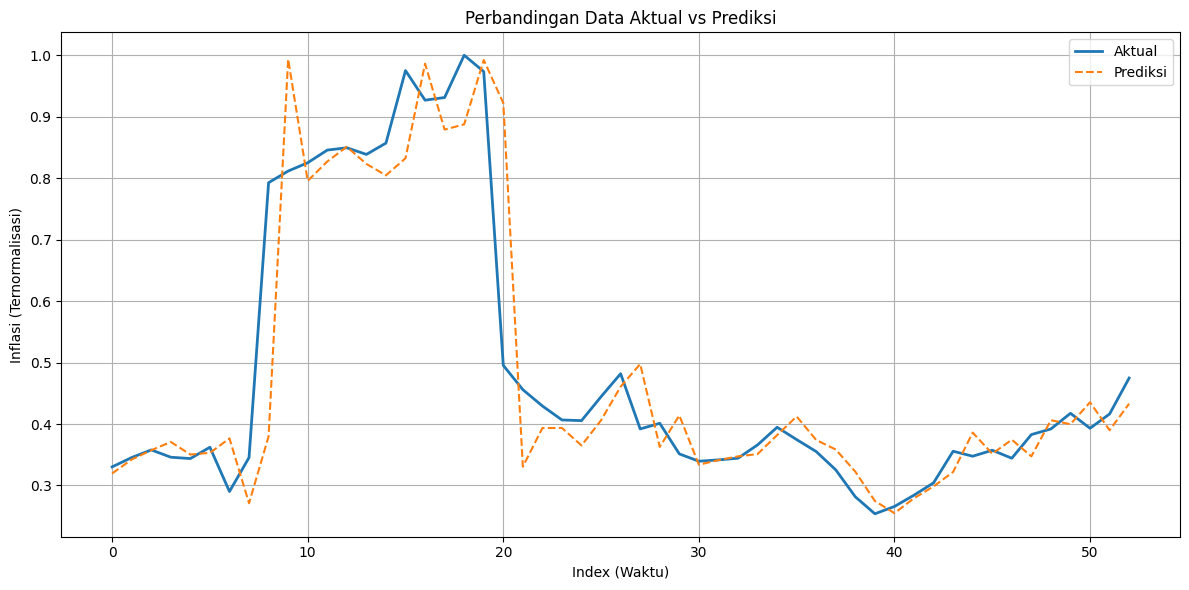

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Aktual', linewidth=2)
plt.plot(y_pred, label='Prediksi', linestyle='--')
plt.title('Perbandingan Data Aktual vs Prediksi')
plt.xlabel('Index (Waktu)')
plt.ylabel('Inflasi (Ternormalisasi)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Ambil sequence terakhir dari hasil prediksi (y_pred) agar nyambung
last_seq = y_pred[-seq_len:].flatten()  # gunakan hasil prediksi terakhir

# Prediksi 12 bulan ke depan
n_future = 12
predictions_future = []

current_seq = last_seq.copy()
for _ in range(n_future):
    input_seq = current_seq.reshape((1, seq_len, 1))
    next_pred = model.predict(input_seq, verbose=0)[0, 0]
    predictions_future.append(next_pred)
    current_seq = np.append(current_seq[1:], next_pred)


In [18]:
# === Gabungkan semua data untuk plotting ===
full_series = np.concatenate([y_train, y_test, predictions_future])
train_range = range(seq_len, seq_len + len(y_train))
test_range = range(seq_len + len(y_train), seq_len + len(y_train) + len(y_test))
future_range = range(seq_len + len(y_train) + len(y_test), seq_len + len(y_train) + len(y_test) + n_future)

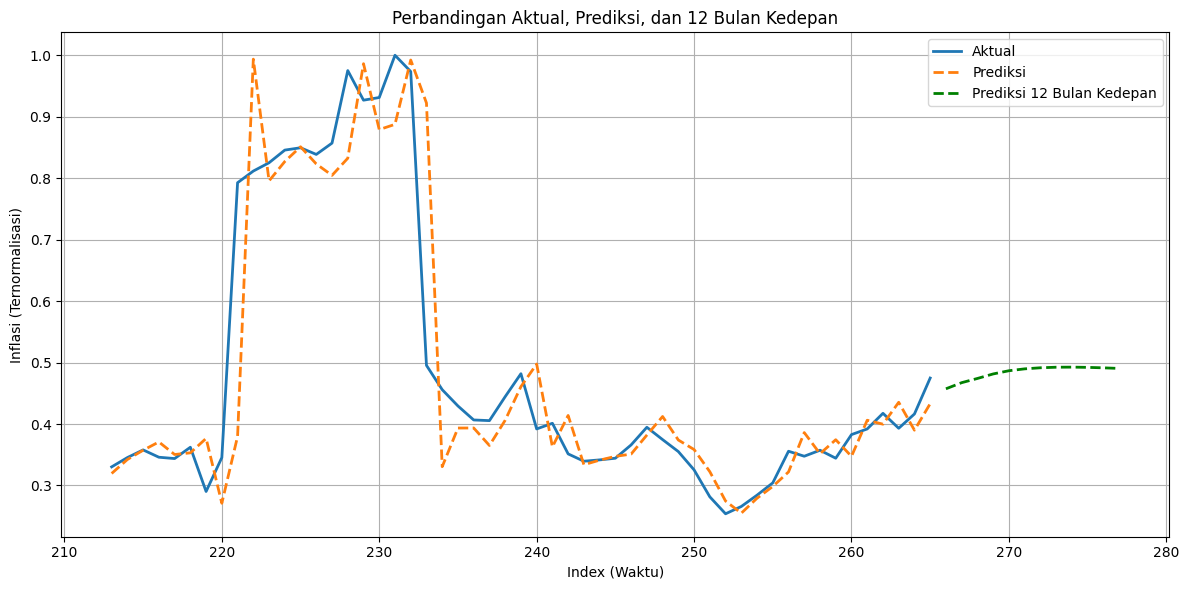

In [20]:
# Plot lanjutan
plt.figure(figsize=(12, 6))
plt.plot(range(seq_len + len(y_train), seq_len + len(y_train) + len(y_test)), y_test, label='Aktual', linewidth=2)
plt.plot(range(seq_len + len(y_train), seq_len + len(y_train) + len(y_test)), y_pred.flatten(), label='Prediksi', linestyle='--', linewidth=2)
plt.plot(future_range, predictions_future, label='Prediksi 12 Bulan Kedepan', linestyle='--', linewidth=2, color='green')
plt.title('Perbandingan Aktual, Prediksi, dan 12 Bulan Kedepan')
plt.xlabel('Index (Waktu)')
plt.ylabel('Inflasi (Ternormalisasi)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
model.save("model_inflasi.h5")